# Pymaceuticals Inc.

# Analysis

After organizing and cleaning the data we were able to gain interesting insight to the possible effectiveness of different drug regimens. After calculating some general summary statistics we saw that Capomulin and Ramicane had lower average tumor sizes than the other regimens. Additionaly, they had lower variation and standard deviation, which could perhaps signal more consistent effects. We furher explored our initial insight through a series of plos and graphs. We isolated the ending tumor size and our box plot clearly illustarated that these two regimens were more effective than the others in decreasing tumor size. We also found that there is a direct correlation between mouse weight and tumor size with an r value of .84. Something that would be interesting to further investigate would be if the mice on the Capomulin and Ramicane regimens had lower weights overall than the other regimens. Additionally, it would be interesting to know why there were more mice completing these two regimens. Were mice in the other studies dying before finishing or was it just a larger starting population?

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_count = mouse_data_complete["Mouse ID"].nunique()
mouse_count

249

In [114]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_row_filter_s = mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
dupe_rows_df = mouse_data_complete[dupe_row_filter_s]
dupe_rows_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [115]:
dupe_mouse_ids = dupe_rows_df["Mouse ID"].unique()
dupe_mouse_ids


array(['g989'], dtype=object)

In [116]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_filter_s = mouse_data_complete["Mouse ID"].isin(dupe_mouse_ids)
mouse_data_complete[dupe_mouse_filter_s]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned_df = mouse_data_complete[~dupe_mouse_filter_s]
mouse_data_cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [118]:
# Checking the number of mice in the clean DataFrame.
mouse_data_cleaned_df["Mouse ID"].nunique()

248

# SUMMARY STATISTICS

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#drug_regimen_groups = mouse_data_cleaned_df.groupby(["Drug Regimen"])
mean_tumor_volume = mouse_data_cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = mouse_data_cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_volume = mouse_data_cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_volume = mouse_data_cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_volume = mouse_data_cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_volume_summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume, 
    "Tumor Volume Std. Err.": sem_tumor_volume,
    }
)
tumor_volume_summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_data_cleaned_df.groupby(["Drug Regimen"]).agg(
    {
        "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]
    }
)   

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# BAR AND PIE CHARTS

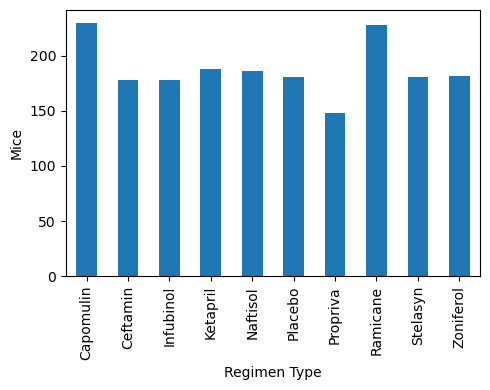

In [121]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.

drug_regimen_type=mouse_data_cleaned_df.groupby(["Drug Regimen"])

# Count how many mice appears in each group
count_mice_per_regimen = drug_regimen_type["Drug Regimen"].count()

# Create a bar chart based off of the group series from before
count_chart = count_mice_per_regimen.plot(kind='bar', figsize=(5,4))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Regimen Type")
count_chart.set_ylabel("Mice")

plt.tight_layout()
plt.show()

<BarContainer object of 10 artists>

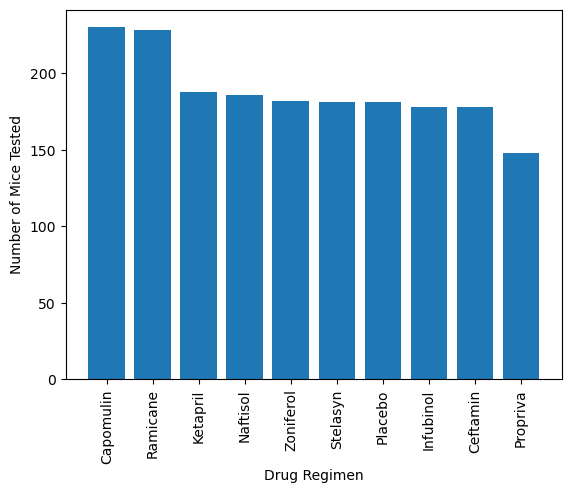

In [122]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#drug_regimen_type=mouse_data_cleaned_df.groupby(["Drug Regimen"])

# Count how many mice appears in each group
#count_mice_per_regimen = drug_regimen_type["Drug Regimen"].count()

counts = mouse_data_cleaned_df['Drug Regimen'].value_counts()

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.bar(counts.index.values,counts.values)


In [123]:
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Sex
Female    922
Male      958
Name: Sex, dtype: int64

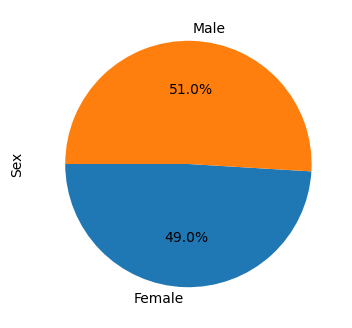

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_type=mouse_data_cleaned_df.groupby(["Sex"])

count_mice_per_sex = sex_type["Sex"].count()

sex_plot = count_mice_per_sex.plot(kind='pie', figsize=(5,4), autopct="%1.1f%%", startangle=180)

count_mice_per_sex

Male      958
Female    922
Name: Sex, dtype: int64

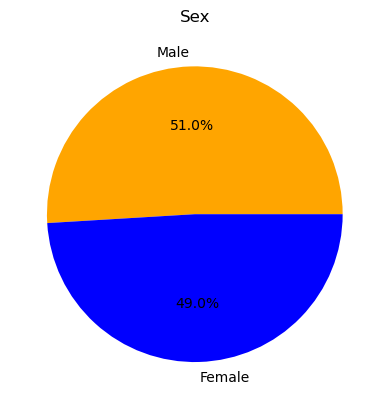

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
counts = mouse_data_cleaned_df['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("Sex")
plt.pie(counts, labels=labels, colors=colors,
        autopct="%1.1f%%")

counts


# QUARTILES, OUTLIERS AND BOXPLOTS

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_mouse_data = mouse_data_cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
final_mouse_data = final_mouse_data.reset_index()
final_mouse_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_data_merge_df = pd.merge(final_mouse_data, mouse_data_cleaned_df, how="left", on=["Mouse ID", "Timepoint"])
final_data_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [127]:
capomulin_data = final_data_merge_df.loc[final_data_merge_df["Drug Regimen"] == "Capomulin"] 
ramicane_data = final_data_merge_df.loc[final_data_merge_df["Drug Regimen"] == "Ramicane"]
infubinol_data = final_data_merge_df.loc[final_data_merge_df["Drug Regimen"] == "Infubinol"]
ceftamin_data = final_data_merge_df.loc[final_data_merge_df["Drug Regimen"] == "Ceftamin"]
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [128]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []
# for drug in drug_list:
    # tumor_vol_data.append(final_data_merge_df.loc[final_data_merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"])

for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_data_merge_df.loc[final_data_merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)

    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #print(f"The lower quartile of {drug} Tumor Volume is: {lowerq}")
    #print(f"The upper quartile of {drug} Tumor Volume is: {upperq}")
    #print(f"The interquartile range of {drug} Tumor Volume is: {iqr}")
    #print(f"The the median of {drug} Tumpor Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Values for {drug} below {lower_bound} could be outliers.")
    #print(f"Values for {drug} above {upper_bound} could be outliers.")

    potential_outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {potential_outliers}")
        

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


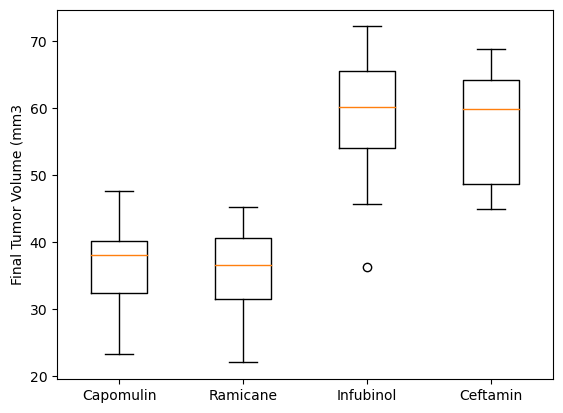

In [129]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot_list  = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3')
ax1.boxplot(tumor_vol_data, labels = box_plot_list)
plt.show()

# LINE AND SCATTER PLOTS

Text(0, 0.5, 'Tumor Volume (mm3)')

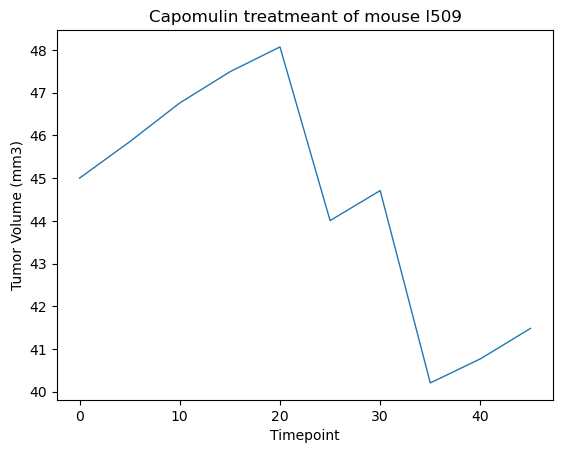

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

lineplot_df = mouse_data_cleaned_df.loc[mouse_data_cleaned_df["Mouse ID"] == "l509",:]
lineplot_df.head()
x_axis = lineplot_df["Timepoint"]
tumor_size = lineplot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size, linewidth=1)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

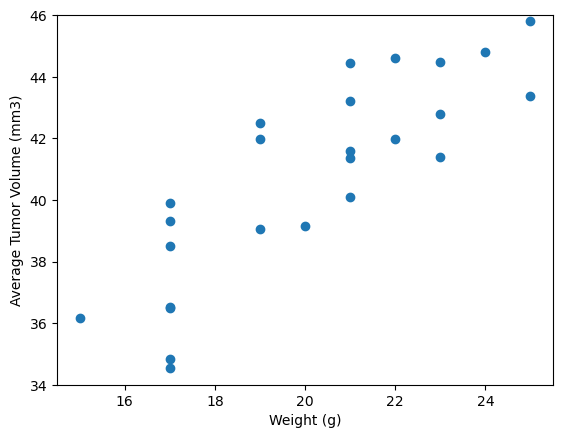

In [131]:


# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_regimen = mouse_data_cleaned_df.loc[mouse_data_cleaned_df["Drug Regimen"] == "Capomulin"] 

# fig1, ax1 = plt.subplots()
avg_tum_vol_cap = capomulin_regimen.groupby(['Mouse ID']).mean()
weight = avg_tum_vol_cap['Weight (g)']
volume= avg_tum_vol_cap['Tumor Volume (mm3)']

plt.scatter(weight, volume)
plt.ylim(34, 46)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# CORRELATION AND REGERESSION

The correlation between mouse weight and the average tumor volume is 0.84


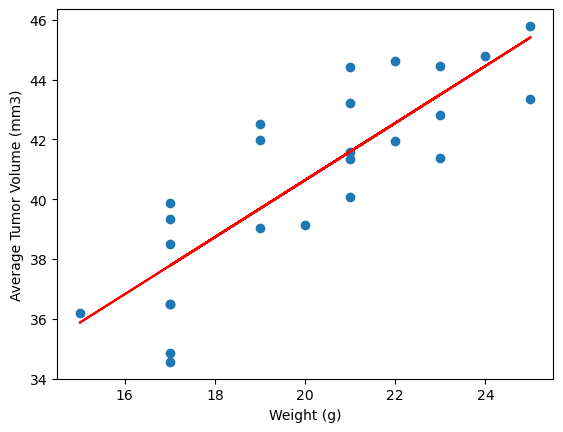

In [132]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(avg_tum_vol_cap['Weight (g)'],avg_tum_vol_cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()